# Análise da Indústria Cinematográfica com o Dataset TMDB

## 1. Evolução da Produção de Filmes ao Longo dos Anos
- Quantos filmes foram produzidos por ano?
- Tendência ao longo das décadas (crescimento ou declínio?).
- Impacto de eventos históricos na produção.

## 2. Quais Gêneros São Mais Produzidos?
- Distribuição dos gêneros mais comuns.
- Comparativo entre os anos: há tendências ou mudanças de interesse?

## 3. Qual a Média de Nota por Gênero?
- Avaliação média (`vote_average`) dos filmes por gênero.
- Existe correlação entre popularidade e avaliação crítica?

## 4. Distribuição de Budget, Revenue, Vote Average e Runtime
- Análises estatísticas e gráficos de dispersão:
  - `budget` (orçamento)
  - `revenue` (receita)
  - `vote_average` (nota média)
  - `runtime` (duração)

## 5. Quais Países Mais Produzem Filmes?
- Contagem de filmes por país (`production_countries`).
- Comparação entre países e décadas.

## 6. Quais Produtoras Mais Lucram?
- Maiores receitas acumuladas por `production_companies`.
- Análise de consistência de lucro por produtora.

## 7. Quais os Filmes com Maior ROI (Return on Investment)?
- Cálculo de ROI: `revenue / budget`.
- Top 10 filmes com melhor retorno financeiro.

## 8. Quais São os Filmes Mais Populares por Década?
- Utilização da métrica `popularity`.
- Seleção dos filmes mais populares por década (anos 70, 80, 90, etc).


# 1. Carregar o CSV no Pandas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ler o arquivo CSV
df = pd.read_csv("TMDB_movie_dataset_v11.csv")
pd.set_option('display.max_columns', None)

# Ver as primeiras linhas
df.head(5)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [2]:
df.shape

(1260572, 24)

In [3]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

In [4]:
df.dtypes

id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
keywords                 object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260572 entries, 0 to 1260571
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1260572 non-null  int64  
 1   title                 1260559 non-null  object 
 2   vote_average          1260572 non-null  float64
 3   vote_count            1260572 non-null  int64  
 4   status                1260572 non-null  object 
 5   release_date          1018793 non-null  object 
 6   revenue               1260572 non-null  int64  
 7   runtime               1260572 non-null  int64  
 8   adult                 1260572 non-null  bool   
 9   backdrop_path         325324 non-null   object 
 10  budget                1260572 non-null  int64  
 11  homepage              131593 non-null   object 
 12  imdb_id               631806 non-null   object 
 13  original_language     1260572 non-null  object 
 14  original_title        1260559 non-

# 2. Criar banco SQLite e carregar o DataFrame

In [6]:
import sqlite3

# Criar conexão com banco em memória (ou use um arquivo .db se quiser salvar)
conn = sqlite3.connect(":memory:")

# Enviar o DataFrame para o SQLite
df.to_sql("tmdb", conn, index=False, if_exists="replace")

1260572

In [7]:
# Exemplo: total de vendas por tipo de pizza
query = """
SELECT * 
FROM tmdb
LIMIT 5;
"""

df_resultado = pd.read_sql_query(query, conn)
df_resultado

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,0,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,0,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,0,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,0,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


# 3. Verificação e tratamento de dados ausentes

In [8]:
df.isnull().sum()         # total de nulos por coluna


id                            0
title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             241779
revenue                       0
runtime                       0
adult                         0
backdrop_path            935248
budget                        0
homepage                1128979
imdb_id                  628766
original_language             0
original_title               13
overview                 272971
popularity                    0
poster_path              421365
tagline                 1084067
genres                   529771
production_companies     706524
production_countries     584586
spoken_languages         561501
keywords                 933802
dtype: int64

In [9]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

homepage                89.560850
tagline                 85.998023
backdrop_path           74.192351
keywords                74.077641
production_companies    56.047889
imdb_id                 49.879420
production_countries    46.374662
spoken_languages        44.543350
genres                  42.026239
poster_path             33.426492
overview                21.654535
release_date            19.180102
title                    0.001031
original_title           0.001031
vote_average             0.000000
vote_count               0.000000
revenue                  0.000000
popularity               0.000000
runtime                  0.000000
original_language        0.000000
status                   0.000000
budget                   0.000000
adult                    0.000000
id                       0.000000
dtype: float64

In [10]:
df.dtypes

id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
keywords                 object
dtype: object

In [11]:
# Transformando coluna data para datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# 4. Feature Engineering

In [12]:
# Criando coluna de ROI (Return of investment) = valor obtido - valor investido
df['ROI%'] = ((df['revenue'] - df['budget']) / df['revenue'])*100
df['ROI%'] = df['ROI%'].round(2)
df.head(5)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,ROI%
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",80.62
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",76.49
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",81.58
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",91.89
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",85.52


In [13]:
# Criando colunas de data (ano, mes, dia e dia da semana!)
df["ano"] = df["release_date"].dt.year
df["mes"] = df["release_date"].dt.month
df["dia"] = df["release_date"].dt.day
df["dia_semana"] = df["release_date"].dt.day_name()  # Segunda, Terça, etc.

df['ano'] = df['ano'].astype('Int64')
df['mes'] = df['mes'].astype('Int64')
df['dia'] = df['dia'].astype('Int64')

df.head(5)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,ROI%,ano,mes,dia,dia_semana
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",80.62,2010,7,15,Thursday
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",76.49,2014,11,5,Wednesday
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",81.58,2008,7,16,Wednesday
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",91.89,2009,12,15,Tuesday
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",85.52,2012,4,25,Wednesday


In [14]:
df['é_sucesso'] = df['revenue'] > df['budget']
df.head(5)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,ROI%,ano,mes,dia,dia_semana,é_sucesso
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",80.62,2010,7,15,Thursday,True
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",76.49,2014,11,5,Wednesday,True
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",81.58,2008,7,16,Wednesday,True
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",91.89,2009,12,15,Tuesday,True
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",85.52,2012,4,25,Wednesday,True


In [15]:
# Atualizo as colunas no SQL
df.to_sql("tmdb", conn, index=False, if_exists="replace")

1260572

# 5. EDA com SQL e Python!

## 1. Evolução da Produção de Filmes ao Longo dos Anos
- Quantos filmes foram produzidos por ano?
- Tendência ao longo das décadas (crescimento ou declínio?).

In [16]:
query = """
SELECT ano, COUNT(DISTINCT id) AS total_filmes 
FROM tmdb
WHERE ano BETWEEN 2000 AND 2025
GROUP BY ano
ORDER BY ano desc
"""

df_resultado = pd.read_sql_query(query, conn)
df_resultado

,ano,total_filmes
0,2025,17643
1,2024,36301
2,2023,47523
3,2022,46796
4,2021,45241
5,2020,41810
6,2019,42552
7,2018,38655
8,2017,36222
9,2016,32662


## 2. Quais Gêneros São Mais Produzidos?
- Distribuição dos gêneros mais comuns.
- Comparativo entre os anos: há tendências ou mudanças de interesse?

# 6. Visualização Gráfica dos Dados

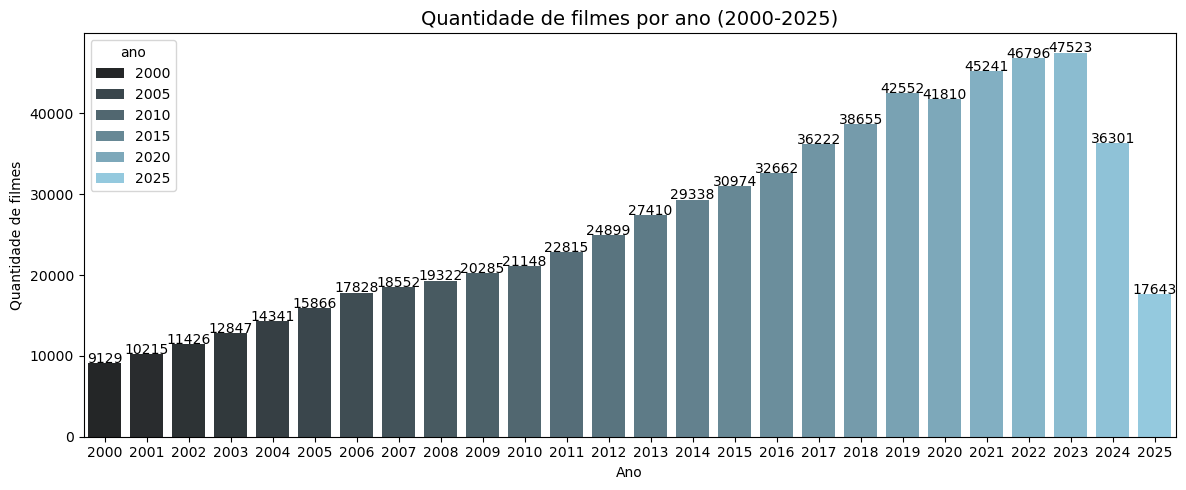

In [17]:
# Quantidade de filmes por ano

# Realizando a query
query = """
SELECT ano, COUNT(DISTINCT id) AS total_filmes 
FROM tmdb
WHERE ano BETWEEN 2000 AND 2025
GROUP BY ano
"""

df_resultado = pd.read_sql_query(query, conn)

# Preparando o plot
plt.figure(figsize=(12, 5))  # gráfico mais compacto
ax = sns.barplot(
    x=df_resultado["ano"],
    y=df_resultado["total_filmes"],
    hue=df_resultado["ano"],
    palette="dark:skyblue",
    #legend = 'brief'
)

# Adicionando os valores em cima das barras
for i, v in enumerate(df_resultado["total_filmes"]):
    ax.text(i, v + 20, str(int(v)), ha='center', fontsize=10)

# Personalizando o gráfico
plt.title("Quantidade de filmes por ano (2000-2025)", fontsize=14)
plt.xlabel("Ano")
plt.ylabel("Quantidade de filmes")
plt.tight_layout()
plt.show()

In [18]:
# Separar
df['production_companies_list'] = df['production_companies'].str.split(', ')
df['production_countries_list'] = df['production_countries'].str.split(', ')
df['genres'] = df['genres'].str.split(', ')


# Explodir com todas as colunas
df_companies = df.explode('production_companies_list')
df_countries = df.explode('production_countries_list')
df_genres = df.explode('genres')

In [19]:
df_genres.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,ROI%,ano,mes,dia,dia_semana,é_sucesso,production_companies_list,production_countries_list
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,Action,"Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",80.62,2010,7,15,Thursday,True,"[Legendary Pictures, Syncopy, Warner Bros. Pic...","[United Kingdom, United States of America]"
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,Science Fiction,"Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",80.62,2010,7,15,Thursday,True,"[Legendary Pictures, Syncopy, Warner Bros. Pic...","[United Kingdom, United States of America]"
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,Adventure,"Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",80.62,2010,7,15,Thursday,True,"[Legendary Pictures, Syncopy, Warner Bros. Pic...","[United Kingdom, United States of America]"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,Adventure,"Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",76.49,2014,11,5,Wednesday,True,"[Legendary Pictures, Syncopy, Lynda Obst Produ...","[United Kingdom, United States of America]"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,Drama,"Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",76.49,2014,11,5,Wednesday,True,"[Legendary Pictures, Syncopy, Lynda Obst Produ...","[United Kingdom, United States of America]"
